In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [20]:
df = pd.read_csv('D:/Unified Mentor Data Science projects/Financial Analytics data.csv')

In [21]:
df.head(20)

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN
5,6,Hind. Unilever,288265.26,8590.00,NaN
6,7,Maruti Suzuki,263493.81,19283.20,NaN
7,8,Infosys,248320.35,17794.00,NaN
8,9,O N G C,239981.50,22995.88,NaN
9,10,St Bk of India,232763.33,57014.08,NaN


In [22]:
df.isnull()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,False,False,True
4,False,False,False,False,True
...,...,...,...,...,...
483,False,False,False,False,True
484,False,False,False,False,True
485,False,False,False,False,True
486,False,False,False,False,True


In [23]:
df.isnull().sum()

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
dtype: int64

In [24]:
print(df.columns)

Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Unnamed: 4'], dtype='object')


In [25]:
df.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
count,488.000000,479.000000,365.000000,94.000000
mean,251.508197,28043.857119,4395.976849,1523.870106
std,145.884078,59464.615831,11092.206185,1800.008836
min,1.000000,3017.070000,47.240000,0.000000
25%,122.750000,4843.575000,593.740000,407.167500
50%,252.500000,9885.050000,1278.300000,702.325000
75%,378.250000,23549.900000,2840.750000,2234.815000
max,500.000000,583436.720000,110666.930000,7757.060000


In [28]:
print(df.shape)

(488, 5)


In [30]:
df.drop(['S.No.', 'Name','Unnamed: 4'],axis=1, inplace=True)
df.head(10)

,Mar Cap - Crore,Sales Qtr - Crore
0,583436.72,99810.00
1,563709.84,30904.00
2,482953.59,20581.27
3,320985.27,9772.02
4,289497.37,16840.51
5,288265.26,8590.00
6,263493.81,19283.20
7,248320.35,17794.00
8,239981.50,22995.88
9,232763.33,57014.08


In [31]:
df = df.dropna(subset=['Mar Cap - Crore', 'Sales Qtr - Crore'])
df.isnull().sum()

Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64

In [32]:
df.describe()

,Mar Cap - Crore,Sales Qtr - Crore
count,365.000000,365.000000
mean,31300.970301,4395.976849
std,67224.641338,11092.206185
min,3017.070000,47.240000
25%,5089.870000,593.740000
50%,9097.330000,1278.300000
75%,21372.180000,2840.750000
max,583436.720000,110666.930000


In [35]:
correlation_matrix = df[['Mar Cap - Crore', 'Sales Qtr - Crore']].corr()

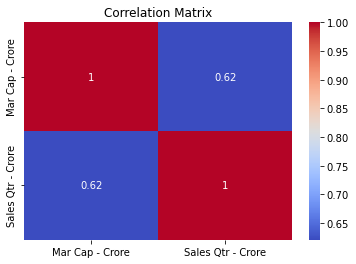

In [36]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [37]:
from sklearn.linear_model import LinearRegression

In [52]:
X = df['Sales Qtr - Crore'].values.reshape(-1, 1)
y = df['Mar Cap - Crore']

In [53]:
linreg = LinearRegression()
linreg.fit(X,y)

LinearRegression()

In [62]:
y_pred = linreg.predict(X)

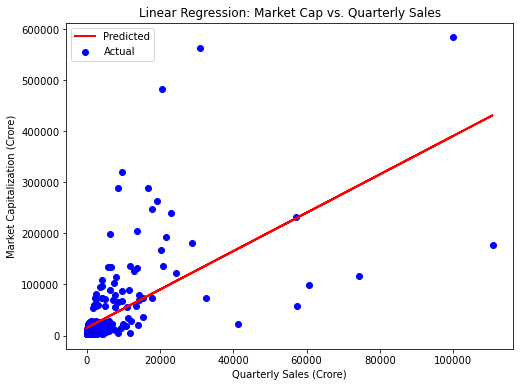

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Sales Qtr - Crore'], df['Mar Cap - Crore'], color='blue', label='Actual')
plt.plot(df['Sales Qtr - Crore'], y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Quarterly Sales (Crore)')
plt.ylabel('Market Capitalization (Crore)')
plt.title('Linear Regression: Market Cap vs. Quarterly Sales')
plt.legend()
plt.show()

In [72]:
print(f'Intercept: {linreg.intercept_}')
print(f'Coefficient: {linreg.coef_[0]}')

Intercept: 14764.25960289231
Coefficient: 3.761782935925633


In [79]:
X = df[['Mar Cap - Crore', 'Sales Qtr - Crore']]

inertia = []
for n in range(1,11):
    kmeans = KMeans(n_clusters = n, random_state=0).fit(X)
    inertia.append(kmeans.inertia_)

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


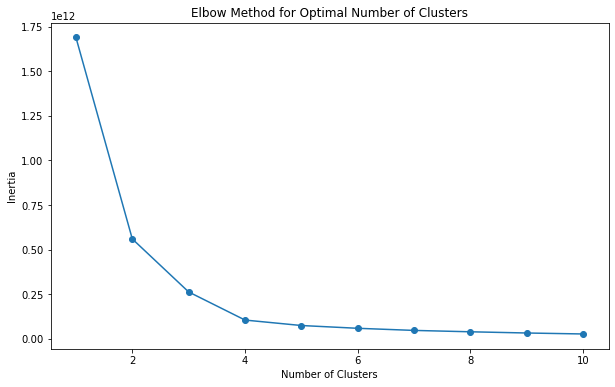

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [90]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
df['Cluster'] = kmeans.labels_

In [93]:
df['Cluster'].head()

0    1
1    1
2    1
3    2
4    2
Name: Cluster, dtype: int32

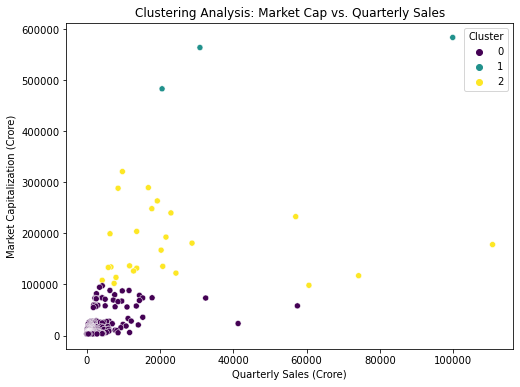

In [97]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = df['Sales Qtr - Crore'], y = df['Mar Cap - Crore'], hue = df['Cluster'], data=df, palette='viridis')
plt.title('Clustering Analysis: Market Cap vs. Quarterly Sales')
plt.xlabel('Quarterly Sales (Crore)')
plt.ylabel('Market Capitalization (Crore)')
plt.show()